# Eligibility Prediction for Loan

### This is the detail of columns:
Loan_ID: Unique Loan ID
<br>
Gender:	Male/ Female
<br>
Married: Applicant married (Y/N)
<br>
Dependents: Number of dependents
<br>
Education: Applicant Education (Graduate/ Under Graduate)
<br>
Self_Employed: Self employed (Y/N)
<br>
ApplicantIncome: Applicant income
<br>
CoapplicantIncome: Coapplicant income
<br>
LoanAmount: Loan amount in thousands
<br>
LoanAmountTerm: Term of loan in months
<br>
Credit_History: credit history meets guidelines
<br>
Property_Area: Urban/ Semi Urban/ Rural
<br>
Loan_Status: (Target) Loan approved (Y/N)
<br>

## Importing the libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Importing the dataset

In [116]:
df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [119]:
# Check if any feature have Null value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## EDA

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

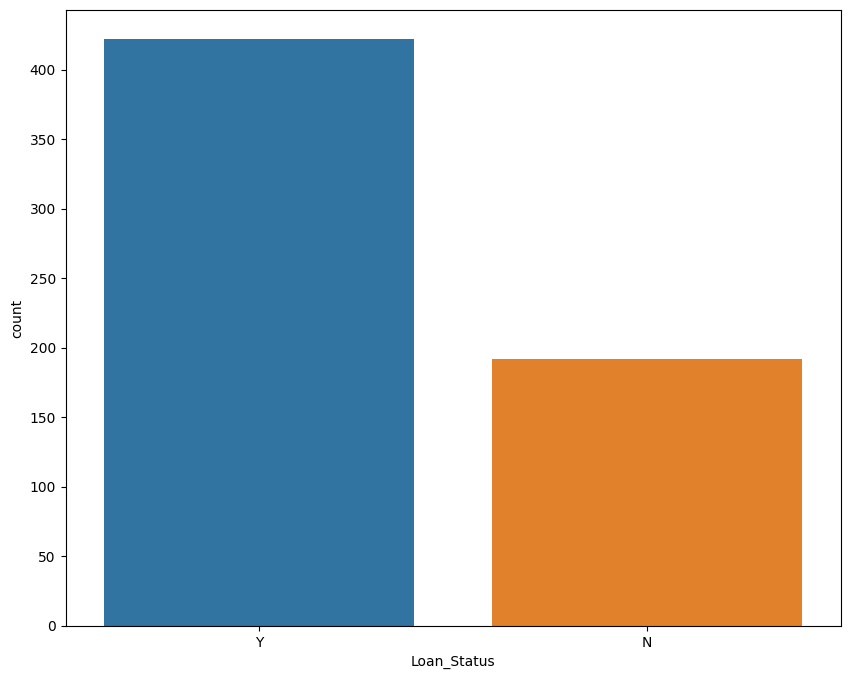

In [120]:
# Check target
plt.figure(figsize=(10, 8))
sns.countplot(x=df["Loan_Status"])

Setelah melihat barplot di atas, dapat diketahui bahwa, jumlah Loan_Status, antara Y dan N tidak balance. Pada process lebih lanjut akan dibuat sama.

<AxesSubplot: xlabel='Gender', ylabel='count'>

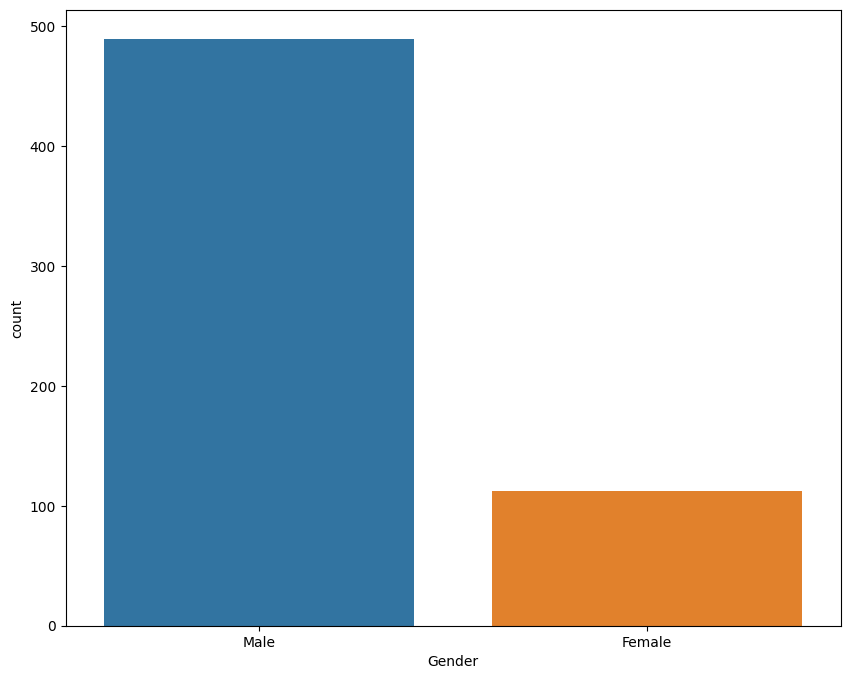

In [121]:
## Check of Gender
plt.figure(figsize=(10, 8))
sns.countplot(x=df["Gender"])

Ternyata dapat diambil kesimpulan dari dataset berikut, Laki-laki lebih banyak mengajukan pinjaman dari pada perempuan.

<AxesSubplot: xlabel='Married', ylabel='count'>

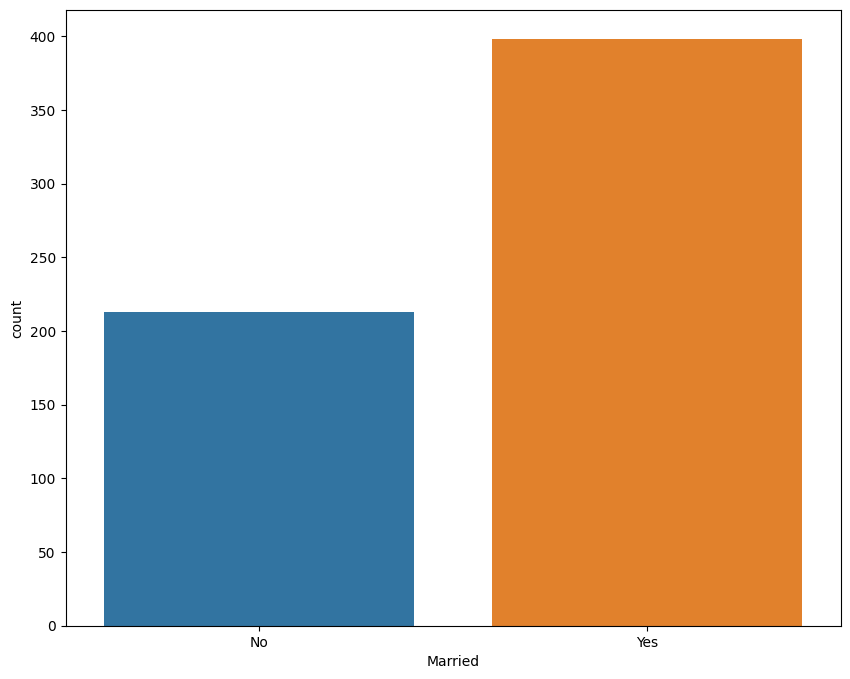

In [122]:
# Check for married
plt.figure(figsize=(10, 8))
sns.countplot(x=df["Married"])

Dan bisa diambil kesimpulan rata-rata yang mengajukan pinjaman memiliki status yang sudah menikah

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

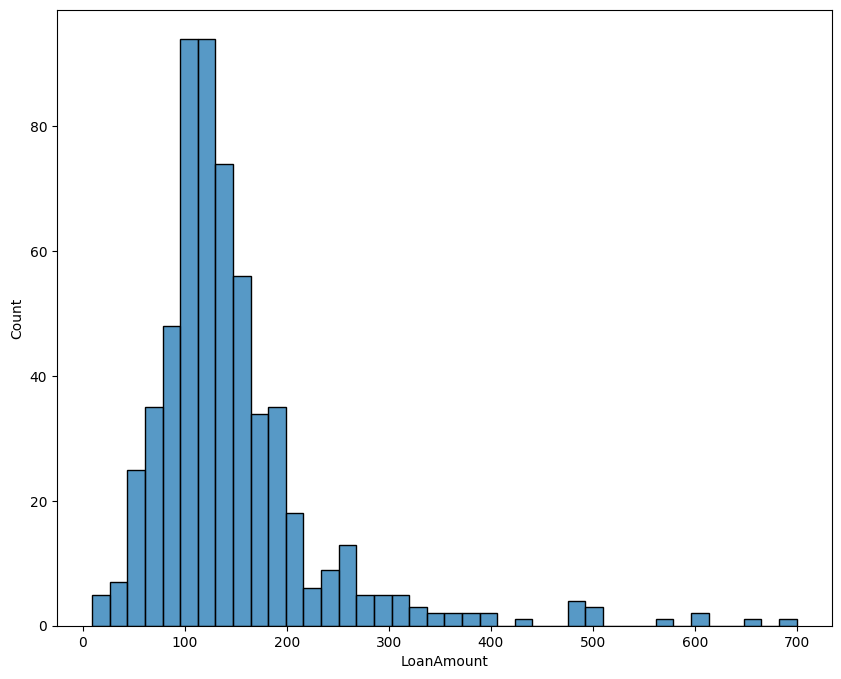

In [123]:
# Check distribution of Loan Amount
plt.figure(figsize=(10, 8))
sns.histplot(df["LoanAmount"], bins=40)

Dari Histogram diatas dapat dilihat persebaran dari jumlah pinjaman yang diberikan. Kebanyakan berkisar antara 100-120 ribu dollar. Dan ada yang menyentuh lebih dari 600 ribu dollar

## Check Correlation for Each Feature

In [124]:
# class label binary
df["Loan_Status_Binary"] = df["Loan_Status"].map({"N":0, "Y":1})

<AxesSubplot: >

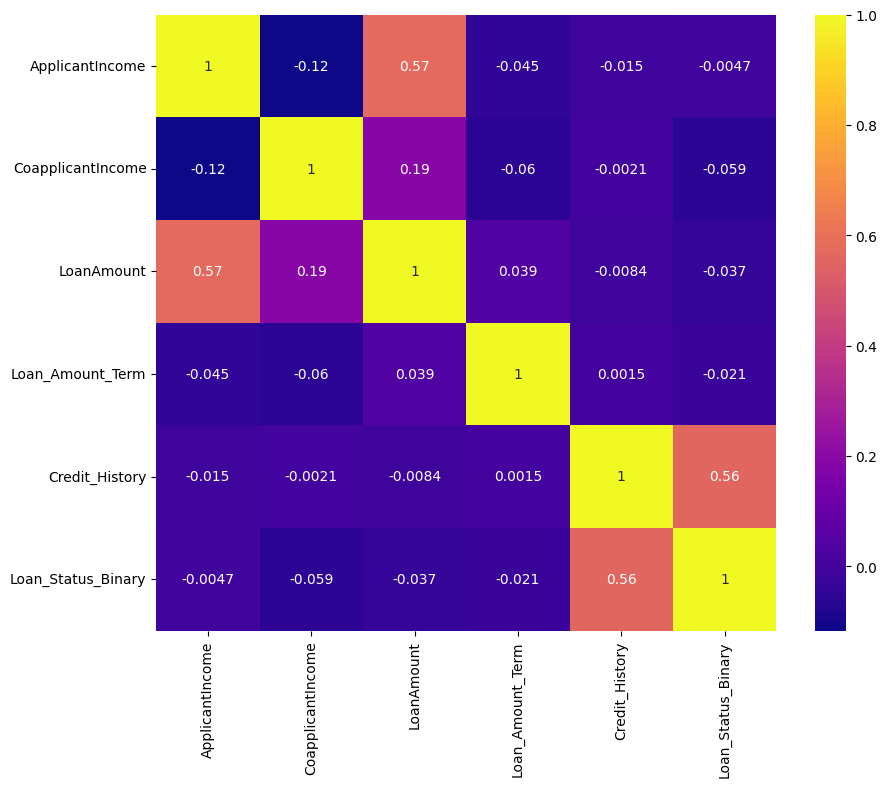

In [125]:
# Let's see correlation for each column
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop("Loan_ID", axis=1).corr(), annot=True, cmap='plasma')

<AxesSubplot: xlabel='Loan_Status', ylabel='LoanAmount'>

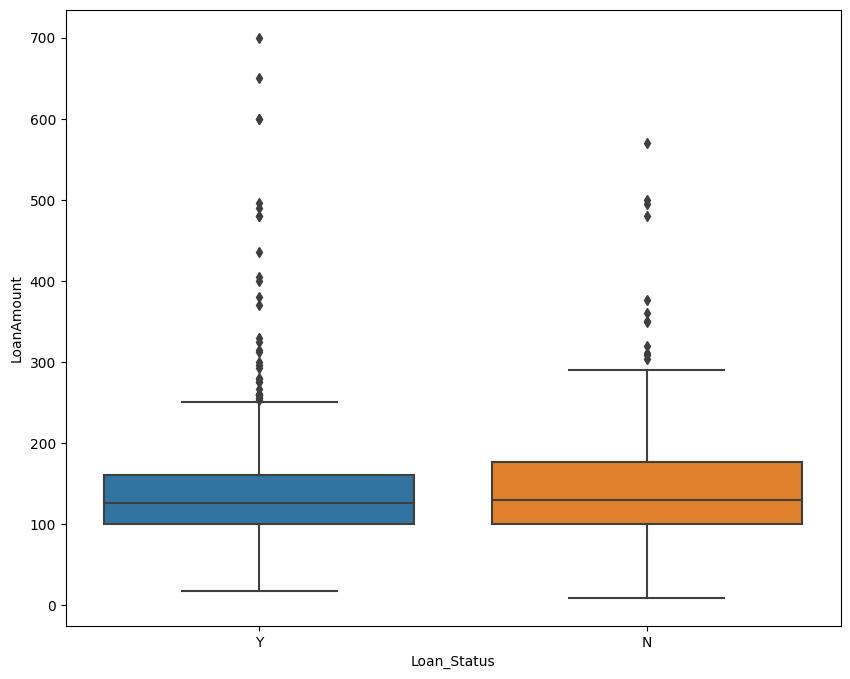

In [126]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df["Loan_Status"], y=df["LoanAmount"])

In [127]:
df.groupby("Loan_Status")["LoanAmount"].describe().T

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
std,85.862783,85.484607
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


## Remove Outlier

Pada section ini akan menghapus nilai pencilan

In [128]:
# Calcuate Q1 and Q3 percentile
q1 = df["LoanAmount"].quantile(0.25)
q3 = df["LoanAmount"].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Determine the Upper bound and Lower bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Delete Outlier from dataframe
df_cleaned = df[(df["LoanAmount"] >= lower_bound) & (df["LoanAmount"] <= upper_bound)]

# Info how many outlier has been deleted
outliers_removed = len(df) - len(df_cleaned)
print(f"Total outlier deleted is: {outliers_removed}")

Total outlier deleted is: 61


<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

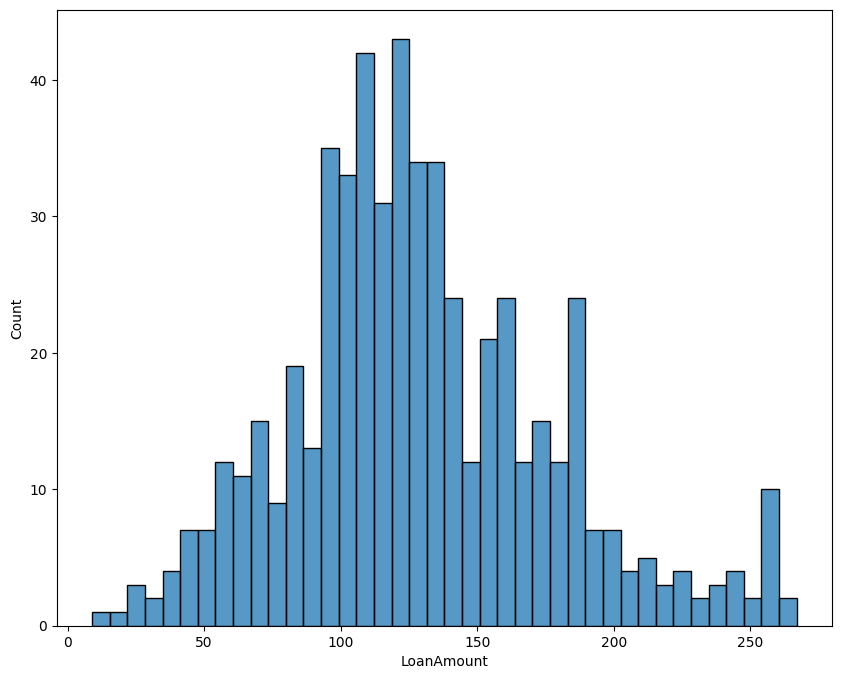

In [129]:
# Check distribution of Loan Amount
plt.figure(figsize=(10, 8))
sns.histplot(df_cleaned["LoanAmount"], bins=40)

<AxesSubplot: >

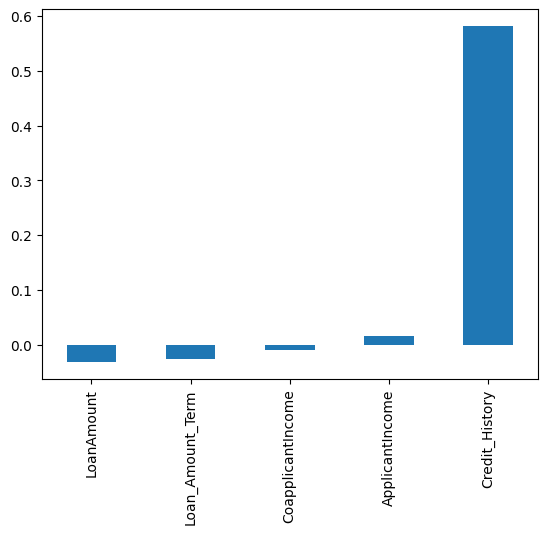

In [130]:
plt.figure()
df_cleaned.drop("Loan_ID", axis=1).corr()["Loan_Status_Binary"][:-1].sort_values(ascending=True).plot(kind="bar")

## Data Preprocessing

In [131]:
# Percentage of missing data
(df_cleaned.isnull().sum()/len(df_cleaned))* 100

Loan_ID               0.000000
Gender                1.808318
Married               0.361664
Dependents            2.350814
Education             0.000000
Self_Employed         5.063291
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            0.000000
Loan_Amount_Term      2.531646
Credit_History        8.137432
Property_Area         0.000000
Loan_Status           0.000000
Loan_Status_Binary    0.000000
dtype: float64

## Separate features and target

In [132]:
X = df_cleaned.drop(["Loan_ID", "Loan_Status","Loan_Status_Binary"], axis=1)
y = df_cleaned["Loan_Status_Binary"]

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating Feature Engineer and Transformer

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define Feature
numeric_features = X.select_dtypes(['int', 'float']).columns.to_list()
categorical_features = X.select_dtypes("object").columns.to_list()

# Preprocessor untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan Transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
)

In [135]:
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler



# Buat pipeline untuk setiap model
models = {
    'SVM': SVC(),
    'CatBoost': CatBoostClassifier(silent=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier()
}

param_grids = {
    'SVM': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    'CatBoost': {'model__iterations': [100, 200, 300], 'model__learning_rate': [0.01, 0.1, 0.5]},
    'Random Forest': {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 10, 20]},
    'KNN': {'model__n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'model__C': [0.1, 1, 10], 'model__penalty': ['l1', 'l2']},
    'Decision Tree': {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.5]}
}

best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    # Create a pipeline with StandardScaler only for columns that are not binary
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('oversampler', RandomOverSampler()),
        ('model', model)
    ])

    # Create an object of GridSearchCV to find the best parameters
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='accuracy')

    # Train the model using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Evaluate the model
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the evaluation results
    print(f'Model: {model_name}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print()

    # Save the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_

print(f'Best Model: {best_model.named_steps["model"]}')
print(f'Best Accuracy: {best_accuracy:.2f}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, best_model.predict(X_test))}')

Model: SVM
Best Parameters: {'model__C': 0.1, 'model__kernel': 'rbf'}
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.90      0.51      0.65        35
           1       0.81      0.97      0.89        76

    accuracy                           0.83       111
   macro avg       0.86      0.74      0.77       111
weighted avg       0.84      0.83      0.81       111


Model: CatBoost
Best Parameters: {'model__iterations': 200, 'model__learning_rate': 0.01}
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        35
           1       0.79      0.93      0.86        76

    accuracy                           0.78       111
   macro avg       0.78      0.70      0.71       111
weighted avg       0.78      0.78      0.77       111


Model: Random Forest
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 50}
Accuracy: 0.76
              precision    recall  f1-score   sup